## <빅데이터분석_공공데이터포털활용>
### 공공데이터포털 사이트의 데이터를 수집하여 빅데이터 분석 및 시각화하기
---
> - 인사이트 도출을 위한 특정 주제를 선정하기
> - 공공데이터포털(https://www.data.go.kr/)에서 관련 파일 데이터(*.csv) 수집하기
> - 수집한 데이터를 이용하여 데이터 분석 후 인사이트 도출하기
> - 분석한 데이터를 시각화하기

**[제출형식]**<br>
주피터 노트북(*.ipynb), 수집한 파일 데이터(*.csv), 결과 PDF파일<br>
\> 본인 명의 폴더를 생성하여 제출할것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
totalData = pd.read_csv('../csvData/한국도로공사_교통사고통계_20201231.csv', encoding='cp949')
hitandrun = pd.read_csv('../csvData/도로교통공단_부문별_뺑소니_교통사고_20181231.csv', encoding='cp949')
unlicensed = pd.read_csv('../csvData/도로교통공단_부문별_무면허_교통사고_20181231.csv', encoding='cp949')
car = pd.read_excel('../csvData/2022년_06월_자동차_등록자료_통계.xlsx')

In [3]:
totalData

,연도,사고,사망,부상
0,2000,3910,569,2845
1,2001,3638,456,2331
2,2002,3957,421,2115
3,2003,3585,348,1843
4,2004,3242,300,1555
5,2005,2880,249,1170
6,2006,2583,284,1131
7,2007,2550,283,1114
8,2008,2449,265,955
9,2009,2374,248,1031


In [4]:
totalData_G = totalData.groupby('사고')['연도'].sum().sort_values()

totalData_ListIndex = totalData_G.values.tolist()
totalData_List = totalData_G.index.tolist()

totalData_Set = list(zip(totalData_ListIndex, totalData_List))
totalData_Set

[(2000, 3910),
 (2001, 3638),
 (2002, 3957),
 (2003, 3585),
 (2004, 3242),
 (2005, 2880),
 (2006, 2583),
 (2007, 2550),
 (2008, 2449),
 (2009, 2374),
 (2010, 2368),
 (2011, 2640),
 (2012, 2600),
 (2013, 2496),
 (2014, 2395),
 (2015, 2251),
 (2016, 2195),
 (2017, 2145),
 (2018, 2030),
 (2019, 1931),
 (2020, 1834)]

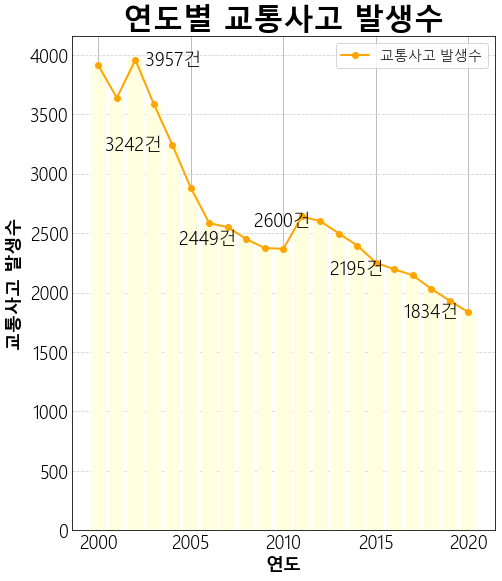

In [154]:
plt.rc("font", family="Malgun Gothic", size=18, weight='light')
plt.figure(figsize=(6, 7))

x = totalData_ListIndex
y = totalData_List

plt.grid(True, color='lightgray', axis='y', linestyle='--')
plt.bar(x, y, color='lightyellow')
plt.plot(x, y, 'bo-', color='orange', linewidth=2, solid_capstyle='round',
        label='교통사고 발생수')
plt.legend(loc='best', ncol=1, fontsize=14)

plt.xlabel("연도", size=18, weight='bold')
plt.ylabel("교통사고 발생수", size=18, weight='bold')
plt.title("연도별 교통사고 발생수", size=30, weight='bold')

plt.text(x[2], y[2], "  %d건  "%y[2], size=18,
         horizontalalignment='left', verticalalignment='center')
for i in range(4, len(x), 4) :
    plt.text(x[i], y[i], "%d건  "%y[i], size=18, 
            horizontalalignment='right', verticalalignment='center')
plt.show()

In [24]:
hitandrun

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,17,0,28,6,20,2
1,서울,중구,13,0,17,4,11,2
2,서울,용산구,41,1,57,15,42,0
3,서울,성동구,24,0,44,4,40,0
4,서울,동대문구,33,0,45,12,33,0
...,...,...,...,...,...,...,...,...
221,울산,남구,56,3,99,27,71,1
222,울산,동구,21,1,24,7,17,0
223,울산,북구,41,0,67,14,53,0
224,울산,울주군,41,2,57,17,40,0


In [25]:
hitandrun_G = hitandrun.groupby('시도')['발생건수'].sum().sort_values()

hitandrun_ListIndex = hitandrun_G.index.tolist()[7:]
hitandrun_List = hitandrun_G.values.tolist()[7:]

print(hitandrun_ListIndex)
print(hitandrun_List)

['전남', '경남', '광주', '경북', '충남', '부산', '인천', '대구', '서울', '경기']
[329, 332, 375, 386, 424, 457, 579, 727, 789, 1988]


In [26]:
hitandrun_Set = list(zip(hitandrun_ListIndex, hitandrun_List))
hitandrun_Df = pd.DataFrame(hitandrun_Set)
hitandrun_Df.columns=['시도', '사고건수']
hitandrun_Df

,시도,사고건수
0,전남,329
1,경남,332
2,광주,375
3,경북,386
4,충남,424
5,부산,457
6,인천,579
7,대구,727
8,서울,789
9,경기,1988


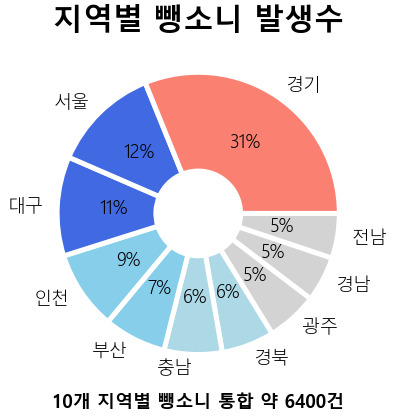

In [56]:
plt.rc("font", family="Malgun Gothic", size=18, weight='light')
plt.figure(figsize=(10, 5))

colors = ['lightgray', 'lightgray', 'lightgray', 'lightblue', 'lightblue',
          'skyblue', 'skyblue', 'royalblue', 'royalblue', 'salmon']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

x = hitandrun_Df['시도']
y = hitandrun_Df['사고건수']

plt.pie(y, labels=x, autopct='%d%%', counterclock=False, colors=colors,
       wedgeprops=wedgeprops)

plt.xlabel("10개 지역별 뺑소니 통합 약 6400건", size=18, weight='bold')
plt.title("지역별 뺑소니 발생수", size=30, weight='bold')
plt.show()

In [10]:
unlicensed_G = unlicensed.groupby('시도')['발생건수'].sum().sort_values()

unlicensed_ListIndex = unlicensed_G.index.tolist()[5:]
unlicensed_List = unlicensed_G.values.tolist()[5:]

print(unlicensed_ListIndex)
print(unlicensed_List)

['충남', '대전', '강원', '경남', '대구', '제주', '서울', '경기']
[3, 4, 5, 5, 8, 9, 16, 43]


In [11]:
unlicensed_Set = list(zip(unlicensed_ListIndex, unlicensed_List))
unlicensed_Df = pd.DataFrame(unlicensed_Set)
unlicensed_Df.columns=['시도', '사고건수']
unlicensed_Df

,시도,사고건수
0,충남,3
1,대전,4
2,강원,5
3,경남,5
4,대구,8
5,제주,9
6,서울,16
7,경기,43


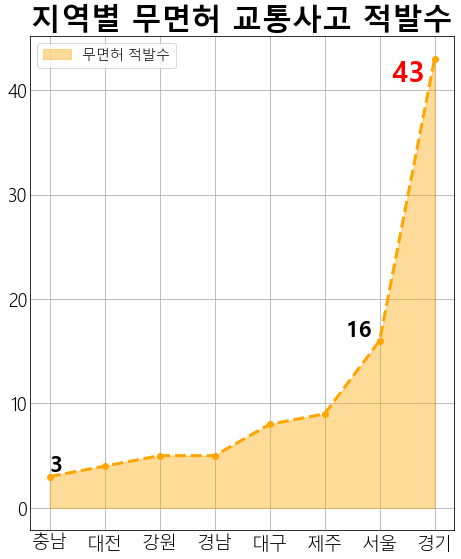

In [161]:
plt.rc("font", family="Malgun Gothic", size=18, weight='light')
plt.figure(figsize=(6, 7))

x = unlicensed_Df['시도']
y = unlicensed_Df['사고건수']

plt.style.use('_mpl-gallery')
plt.fill_between(x, y, alpha=0.4, color='orange', label='무면허 적발수')
plt.plot(x, y, 'bo--', linewidth=3, color='orange')
plt.text(x[0], y[0], y[0], size=22, weight='bold',
         horizontalalignment='left', verticalalignment='bottom')
plt.text(x[6], y[6], "%d "%y[6], size=22, weight='bold',
         horizontalalignment='right', verticalalignment='bottom')
plt.text(x[7], y[7], "%d " %y[7], size=28, weight='bold', color='red',
        horizontalalignment='right', verticalalignment='top')
plt.legend(loc='upper left', ncol=1, fontsize=14)

plt.title("지역별 무면허 교통사고 적발수", size=30, weight='bold')
plt.show()

In [13]:
car_Pre = car.head(17)
car_Pre

,시도별,Unnamed: 1,관용,자가용,영업용,계
0,서울,NaN,4585,2622548,126160,2753293
1,부산,NaN,1691,1139352,107529,1248572
2,대구,NaN,975,1004115,26063,1031153
3,인천,NaN,1571,1179622,268991,1450184
4,광주,NaN,846,577010,14376,592232
5,대전,NaN,655,575146,16042,591843
6,울산,NaN,710,487508,7914,496132
7,세종,NaN,348,167193,998,168539
8,경기,NaN,7566,5156713,74034,5238313
9,강원,NaN,1845,631060,12082,644987


In [14]:
car_G = car_Pre.groupby('시도별')['계'].sum().sort_values()

car_ListIndex = car_G.index.tolist()
car_List = car_G.values.tolist()

car_Set = list(zip(car_ListIndex, car_List))
car_Set

[('세종', 168539),
 ('울산', 496132),
 ('제주', 571785),
 ('대전', 591843),
 ('광주', 592232),
 ('강원', 644987),
 ('충북', 708829),
 ('전북', 742428),
 ('전남', 899233),
 ('충남', 919118),
 ('대구', 1031153),
 ('경북', 1134215),
 ('부산', 1248572),
 ('인천', 1450184),
 ('경남', 1504212),
 ('서울', 2753293),
 ('경기', 5238313)]

In [176]:
car_Set = list(zip(car_ListIndex[6:], car_List[6:]))
car_Df = pd.DataFrame(car_Set)
car_Df.columns=['시도', '승합차 수']
car_Df

,시도,승합차 수
0,충북,708829
1,전북,742428
2,전남,899233
3,충남,919118
4,대구,1031153
5,경북,1134215
6,부산,1248572
7,인천,1450184
8,경남,1504212
9,서울,2753293


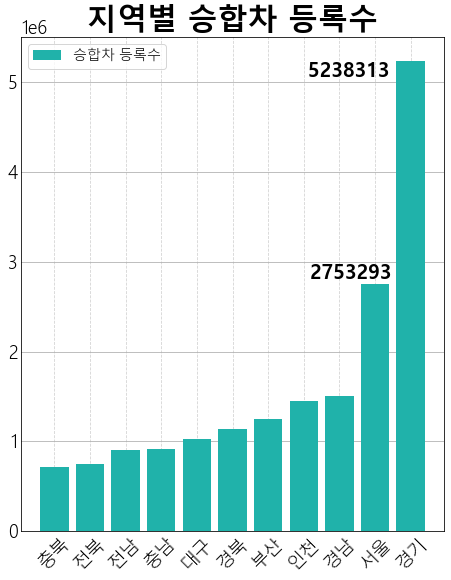

In [182]:
plt.rc("font", family="Malgun Gothic", size=18, weight='light')
plt.figure(figsize=(6, 7))

x = car_ListIndex[6:]
y = car_List[6:]

plt.grid(True, color='lightgray', axis='x',linestyle='--')
plt.bar(x, y, color='lightseagreen', label='승합차 등록수')
plt.legend(loc='best', ncol=2, fontsize=14)
plt.text(x[9], y[9], "%d       "%y[9], size=20, weight='bold',
         horizontalalignment='center', verticalalignment='bottom')
plt.text(x[10], y[10], "%d   "%y[10], size=20, weight='bold',
         horizontalalignment='right', verticalalignment='top')

plt.xticks(rotation=45)
plt.title("지역별 승합차 등록수", size=30, weight='bold')

plt.show()